# Problem Statement
The company X Education is facing a problem of low conversion of leads to customers, the rate of conversion being around 30%. To counter this situation, the company wishes to identify the leads most likely to be converted, so that the sales team can focus their attention on them and get as many conversions out of that pool as possible.

The company requires us to build a model wherein we need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

In [1]:
# Importing all the required packages and libraries

# For Data Analysis and Data wrangling
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# To display all column
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# Reading and understand the data

In [3]:
lead_df = pd.read_csv(r"C:\Users\Hitesh\Desktop\Untitled Folder\Module 2 Couse 4 - Machine Learning\Lead Scoring Case Study Assignment\Lead Scoring Assignment\Leads.csv")
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
lead_df.shape

(9240, 37)

In [5]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
#checking column info
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# Columns in the dataset
lead_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

# Data Cleaning

In [8]:
#checking number of null values in each column
lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

- There are lots of column which have high number of missing values
- There are 9000k datapoints in our dataframe
- We can eliminate the columns having greater missing values as they are of no use to us.
- Or we can calculate the percentage of missing values and drop them.

In [9]:
#checking percentage of null values in each column
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [10]:
# Observed that there are a few columns in which there is a level called 'Select' 
# This Select basically means that the student had not selected the option for that particular column 
# Converting 'Select' values to NaN.

lead_df = lead_df.replace('Select', np.nan)

In [11]:
# Droping the variable Prospect ID and Lead Number as it won't be of any use in our analysis.
lead_df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [12]:
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [13]:
# Again calculating the null values and its percentage
lead_df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [14]:
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [15]:
# We can eliminate the columns having greater equal to 40% missing values as they are of no use to us.
cols = lead_df.columns

for i in cols:
    if((100*(lead_df[i].isnull().sum()/len(lead_df.index))) >= 40):
        lead_df.drop(i, 1, inplace = True)
# Droping the column Tags 
lead_df.drop('Tags', 1, inplace = True)

In [16]:
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified


In [17]:
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

All the higher percentage of missing values are now eliminated

# Data Preparation

In [18]:
#In city column we observed that value count of NaN is more compared to any other City name
#We will replace Nan by Mumbai as after NaN mumbai city has the highest count
lead_df['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [19]:
#Replacing NaN to Mumbai
lead_df['City'] = lead_df['City'].replace(np.nan,'Mumbai')

In [20]:
lead_df['City'].value_counts(dropna=False)

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

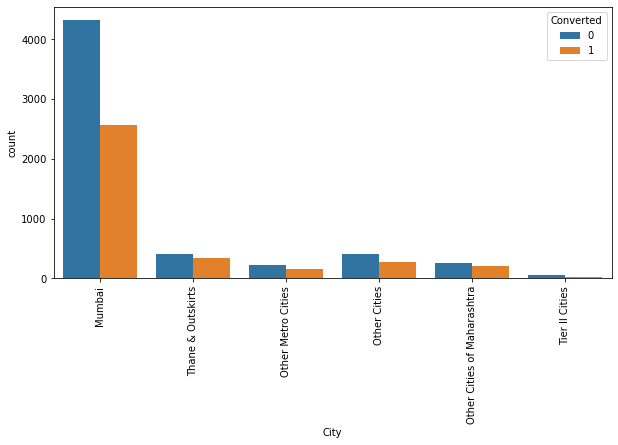

In [21]:
#plotting counterplot of City columnn after replacing NaN values

plt.figure(figsize=(10,5))
s1=sns.countplot(lead_df.City, hue=lead_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [22]:
len(lead_df[lead_df['City'] == 'Mumbai'])/lead_df.shape[0]

0.7457792207792208

In [23]:
#Checking the values of Country column
lead_df['Country'].value_counts(dropna = False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [24]:
# Let's try to replace NaN with  India
lead_df['Country'] = lead_df['Country'].replace(np.nan,'India')

In [25]:
lead_df['Country'].value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [26]:
len(lead_df[lead_df['Country'] == 'India'])/lead_df.shape[0]

0.968939393939394

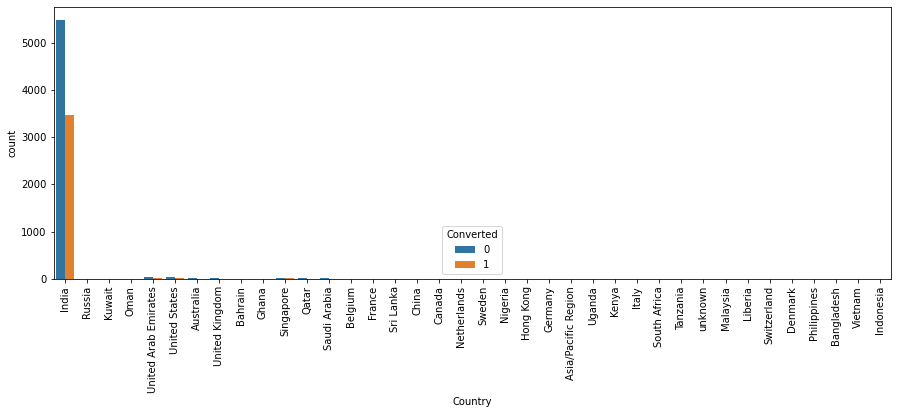

In [27]:
# Almost 97% is india, this will bend analysis will skewed towards India, so this is better removed from the dataset
# Plotting counterplot of Country columnn after replacing NaN values
plt.figure(figsize=(15,5))
s1=sns.countplot(lead_df.Country, hue=lead_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [28]:
lead_df.drop('Country', 1, inplace = True)

In [29]:
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified


In [30]:
# Let's analysisi 'What matters most to you in choosing a course' column which has 29.32% of Null values.
lead_df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [31]:
# Replacing the NaN values with "Better Career Prospects"
lead_df['What matters most to you in choosing a course'] = lead_df['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

In [32]:
lead_df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

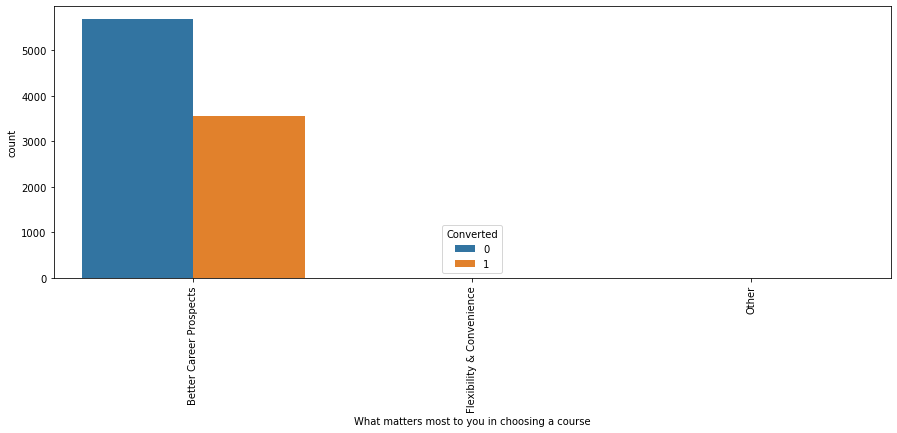

In [33]:
# Plotting counterplot of Country columnn after replacing NaN values
plt.figure(figsize=(15,5))
s1=sns.countplot(lead_df['What matters most to you in choosing a course'], hue=lead_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [34]:
#checking value counts of variable
lead_df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [35]:
len(lead_df[lead_df['What matters most to you in choosing a course'] == 'Better Career Prospects'])/lead_df.shape[0]

0.9996753246753247

In [36]:
# Almost 99.9% is Better Career Prospects, this will bend analysis and will skewed towards Better Career Prospects, so this is better removed from the dataset
lead_df.drop('What matters most to you in choosing a course', 1, inplace = True)

In [37]:
# Let's analysis What is your current occupation column which has 29.11% of Null values.
lead_df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [38]:
# Replacing the NaN values with "Unemployed"
lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace(np.nan, 'Unemployed')

In [39]:
lead_df['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

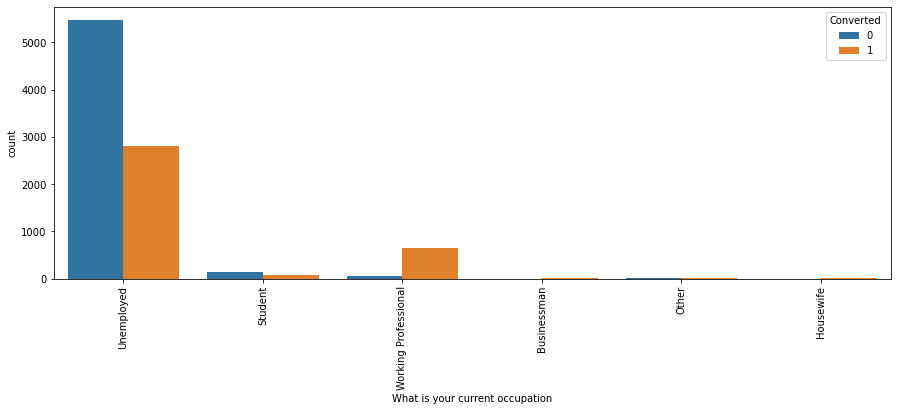

In [40]:
# Plotting counterplot of Country columnn after replacing NaN values
plt.figure(figsize=(15,5))
s1=sns.countplot(lead_df['What is your current occupation'], hue=lead_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [41]:
len(lead_df[lead_df['What is your current occupation'] == 'Unemployed'])/lead_df.shape[0]

0.8971861471861472

In [42]:
lead_df.shape

(9240, 25)

In [43]:
# Let's analysis What is your current occupation column which has 36.58% of Null values.
lead_df['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [44]:
# Observed lot of Nan in Specialization column, so we replace it by Not Specified
lead_df['Specialization'] = lead_df['Specialization'].replace(np.nan, 'Not Specified')

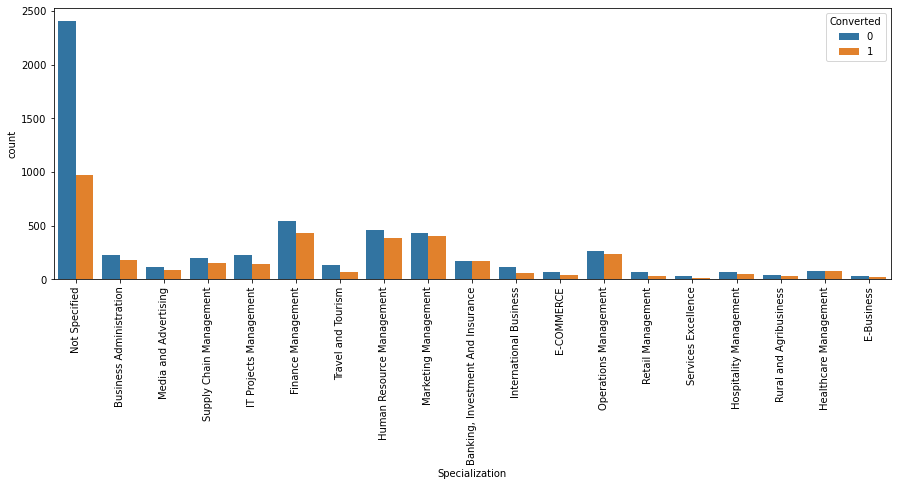

In [45]:
# Plotting counterplot of Country columnn after replacing NaN values
plt.figure(figsize=(15,5))
s1=sns.countplot(lead_df['Specialization'], hue=lead_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [46]:
len(lead_df[lead_df['Specialization'] == 'Not Specified'])/lead_df.shape[0]

0.3658008658008658

In [47]:
#Checking missing value percentage
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Update me on Supply Chain Content           0.00
Get updates on DM Co

In [48]:
round(100*(lead_df.isnull().sum()/(lead_df.shape[0])), 2)

Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Update me on Supply Chain Content           0.00
Get updates on DM Co

In [49]:
# Analyse Last Activity with 1.11 percentage of missing values
lead_df["Last Activity"].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [50]:
#Drop all rows which have Nan Values. Since the number of Dropped rows is less than 2%,  will not affect the model
lead_df = lead_df.dropna()

In [51]:
lead_df["Last Activity"].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [52]:
# Again checking percentage of missing values
round(100*(lead_df.isnull().sum()/(lead_df.shape[0])), 2)

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content               

In [53]:
lead_df.shape

(9074, 25)

In [54]:
#Let's check Do not call, if it has more values of do not call we can drop this column
lead_df['Do Not Call'].value_counts(dropna=False)

No     9072
Yes       2
Name: Do Not Call, dtype: int64

In [55]:
#We can drop the Do Not Call Column since > 90% is of only value 'No'
lead_df.drop('Do Not Call', 1, inplace = True)

In [56]:
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,No,No,No,No,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified


In [57]:
lead_df.shape

(9074, 24)

In [58]:
#Checking imbalance column and dropping them just like Do not call
lead_df.Search.value_counts(dropna=False)

No     9060
Yes      14
Name: Search, dtype: int64

In [59]:
lead_df['X Education Forums'].value_counts(dropna=False)

No     9073
Yes       1
Name: X Education Forums, dtype: int64

In [60]:
lead_df.Magazine.value_counts(dropna=False)

No    9074
Name: Magazine, dtype: int64

In [61]:
lead_df['Newspaper Article'].value_counts(dropna=False)

No     9072
Yes       2
Name: Newspaper Article, dtype: int64

In [62]:
lead_df['Through Recommendations'].value_counts(dropna=False)

No     9067
Yes       7
Name: Through Recommendations, dtype: int64

In [63]:
lead_df.Newspaper.value_counts(dropna=False)

No     9073
Yes       1
Name: Newspaper, dtype: int64

In [64]:
lead_df['Digital Advertisement'].value_counts(dropna=False)

No     9070
Yes       4
Name: Digital Advertisement, dtype: int64

In [65]:
lead_df['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9074
Name: Receive More Updates About Our Courses, dtype: int64

In [66]:
lead_df['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9074
Name: Update me on Supply Chain Content, dtype: int64

In [67]:
lead_df['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9074
Name: I agree to pay the amount through cheque, dtype: int64

In [68]:
lead_df['Get updates on DM Content'].value_counts(dropna=False)

No    9074
Name: Get updates on DM Content, dtype: int64

In [69]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9074 non-null   object 
 1   Lead Source                               9074 non-null   object 
 2   Do Not Email                              9074 non-null   object 
 3   Converted                                 9074 non-null   int64  
 4   TotalVisits                               9074 non-null   float64
 5   Total Time Spent on Website               9074 non-null   int64  
 6   Page Views Per Visit                      9074 non-null   float64
 7   Last Activity                             9074 non-null   object 
 8   Specialization                            9074 non-null   object 
 9   What is your current occupation           9074 non-null   object 
 10  Search                              

In [70]:
#We are adding all these imbalance column in a list and dropping them.
cols_drop = []

cols_drop.extend(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'])

In [71]:
#Added in a list
cols_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [72]:
#Now dropping them
lead_df = lead_df.drop(cols_drop,1)

In [73]:
lead_df.shape

(9074, 13)

In [74]:
lead_df

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.00,Page Visited on Website,Not Specified,Unemployed,Mumbai,No,Modified
1,API,Organic Search,No,0,5.0,674,2.50,Email Opened,Not Specified,Unemployed,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.00,Converted to Lead,Not Specified,Unemployed,Mumbai,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,1,8.0,1845,2.67,Email Marked Spam,IT Projects Management,Unemployed,Mumbai,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,Mumbai,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,Mumbai,Yes,SMS Sent
9238,Landing Page Submission,Google,No,1,3.0,499,3.00,SMS Sent,Human Resource Management,Unemployed,Other Metro Cities,No,SMS Sent


# Analysis of numerical variables 

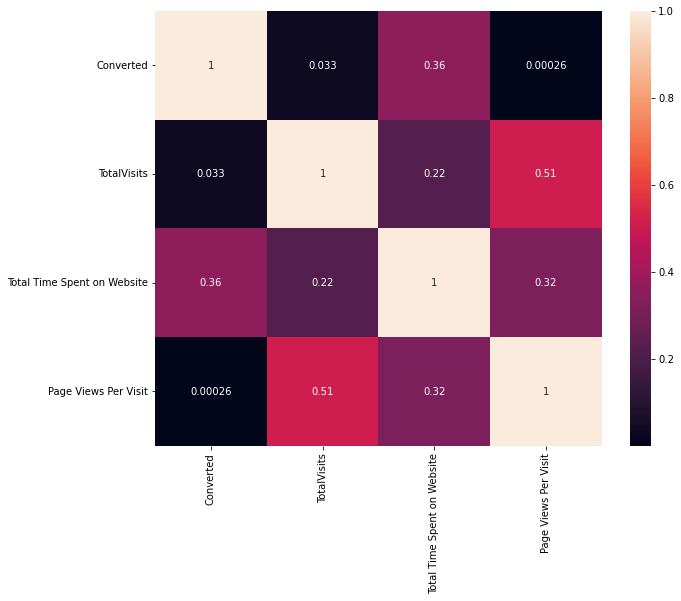

In [75]:
# Checking the correlation of data 

plt.figure(figsize=(10,8))
sns.heatmap(lead_df.corr(), annot=True)
plt.show()

Observation-
There doesn't seem to be much correlation between the numerical variables

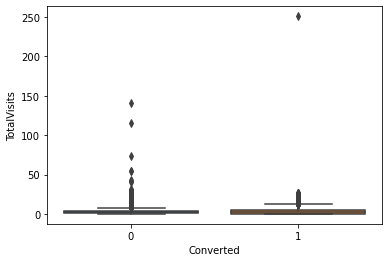

In [76]:
#boxplot of Total Visits vs Converted variable, no of people visit vs no of people converted
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_df)
plt.show()

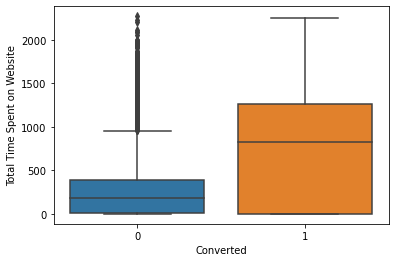

In [77]:
#boxplot of Total Time Spent on Website vs Converted variable, no of people spend time on site vs no of people converted

sns.boxplot(x=lead_df.Converted, y=lead_df['Total Time Spent on Website'])
plt.show()

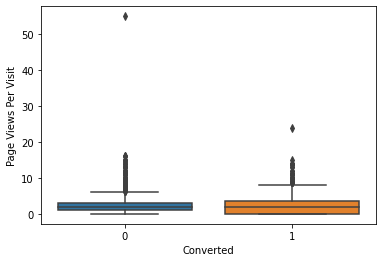

In [78]:
#boxplot of Page Views Per Visit vs Converted variable

sns.boxplot(x=lead_df.Converted,y=lead_df['Page Views Per Visit'])
plt.show()

# Dummy variable Analysis
     Let's convert A free copy of Mastering The Interview and Do Not Email into dummy variable( 0s and 1s)

In [79]:
# List of variables to map
varlist =  ['A free copy of Mastering The Interview','Do Not Email']

In [80]:
# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

In [81]:
# Applying the function to the varlist list
lead_df[varlist] = lead_df[varlist].apply(binary_map)

In [82]:
lead_df[varlist]

,A free copy of Mastering The Interview,Do Not Email
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
9235,0,1
9236,1,0
9237,1,1
9238,0,0


In [83]:
# Creating dummy variables using the 'get_dummies' command
# Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select' which is useless so we
# drop that level by specifying it explicitly
dummy = pd.get_dummies(lead_df['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
lead_df = pd.concat([lead_df, dummy], axis = 1)

In [84]:
# dummies for the column Lead Source,Last Activity, Last Notable Activity, Lead Origin,What is your current occupation.
dummy1 = pd.get_dummies(lead_df['Lead Source'], prefix  = 'Lead Source', drop_first=True)
lead_df = pd.concat([lead_df, dummy1], axis = 1)

In [85]:
dummy2 = pd.get_dummies(lead_df['Last Activity'], prefix  = 'Last Activity', drop_first=True)
lead_df = pd.concat([lead_df, dummy2], axis = 1)

In [86]:
dummy3 = pd.get_dummies(lead_df['Last Notable Activity'], prefix  = 'Last Notable Activity', drop_first=True)
lead_df = pd.concat([lead_df, dummy3], axis = 1)

In [87]:
dummy4 = pd.get_dummies(lead_df[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)
lead_df = pd.concat([lead_df,dummy4],1)

In [88]:
lead_df

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,API,Olark Chat,0,0,0.0,0,0.00,Page Visited on Website,Not Specified,Unemployed,Mumbai,0,Modified,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.50,Email Opened,Not Specified,Unemployed,Mumbai,0,Email Opened,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Mumbai,1,Email Opened,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,Mumbai,0,Modified,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0

In [89]:
dummy1

,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9236,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9237,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9238,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [90]:
dummy2

,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9236,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9237,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9238,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [91]:
dummy3

,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9236,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9237,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9238,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [92]:
dummy4

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,0,0,0,0,0,1,0,0,0,0,0,0
9236,1,0,0,0,0,0,1,0,0,0,0,0,0
9237,1,0,0,0,0,0,1,0,0,0,0,0,0
9238,1,0,0,0,0,0,1,0,0,0,1,0,0


In [93]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 95 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Origin                                           9074 non-null   object 
 1   Lead Source                                           9074 non-null   object 
 2   Do Not Email                                          9074 non-null   int64  
 3   Converted                                             9074 non-null   int64  
 4   TotalVisits                                           9074 non-null   float64
 5   Total Time Spent on Website                           9074 non-null   int64  
 6   Page Views Per Visit                                  9074 non-null   float64
 7   Last Activity                                         9074 non-null   object 
 8   Specialization                                        9074

In [94]:
#We are adding all these categorical column in a list and dropping them.
categorical_cols= (['Specialization','Lead Source', 'Last Activity', 'Last Notable Activity', 'Lead Origin','What is your current occupation',
                             'City'])
categorical_cols

['Specialization',
 'Lead Source',
 'Last Activity',
 'Last Notable Activity',
 'Lead Origin',
 'What is your current occupation',
 'City']

In [95]:
lead_df.drop(categorical_cols,1,inplace = True)

In [96]:
# this column needs to be droped we duplicate column for same purpose 
lead_df.drop('Lead Source_google', 1, inplace = True)

In [97]:
# this column needs to be droped we duplicate column for same purpose 
lead_df.drop('Last Notable Activity_Had a Phone Conversation', 1, inplace = True)

In [98]:
# this column needs to be droped we duplicate column for same purpose 
lead_df.drop('Last Notable Activity_Olark Chat Conversation', 1, inplace = True)

In [99]:
lead_df

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Modified,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0.0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,1,2.0,1532,2.00,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1.0,305,1.00,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,0,1,2.0,1428,1.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,1,8.0,1845,2.67,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0

## Test-train split
    Importing the libraries
    Putting response variable to y

In [100]:
#Importing the libraries
from sklearn.model_selection import train_test_split

# Putting response variable to y
y = lead_df['Converted']

y.head()

X=lead_df.drop('Converted', axis=1)

In [101]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

In [103]:
#Using Standard Scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Modified,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
3563,-0.281723,-0.283641,0.424674,-0.172345,1.470663,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
273,-0.281723,0.311996,-0.334399,0.056606,-0.679966,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1903,-0.281723,-0.283641,-0.706493,-0.172345,-0.679966,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4982,-0.281723,-0.085096,2.419099,0.285556,-0.679966,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3213,-0.281723,-0.085096,-0.323236,0.285556,-0.679966,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [104]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Modified,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
3563,-0.281723,-0.283641,0.424674,-0.172345,1.470663,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
273,-0.281723,0.311996,-0.334399,0.056606,-0.679966,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1903,-0.281723,-0.283641,-0.706493,-0.172345,-0.679966,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4982,-0.281723,-0.085096,2.419099,0.285556,-0.679966,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3213,-0.281723,-0.085096,-0.323236,0.285556,-0.679966,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


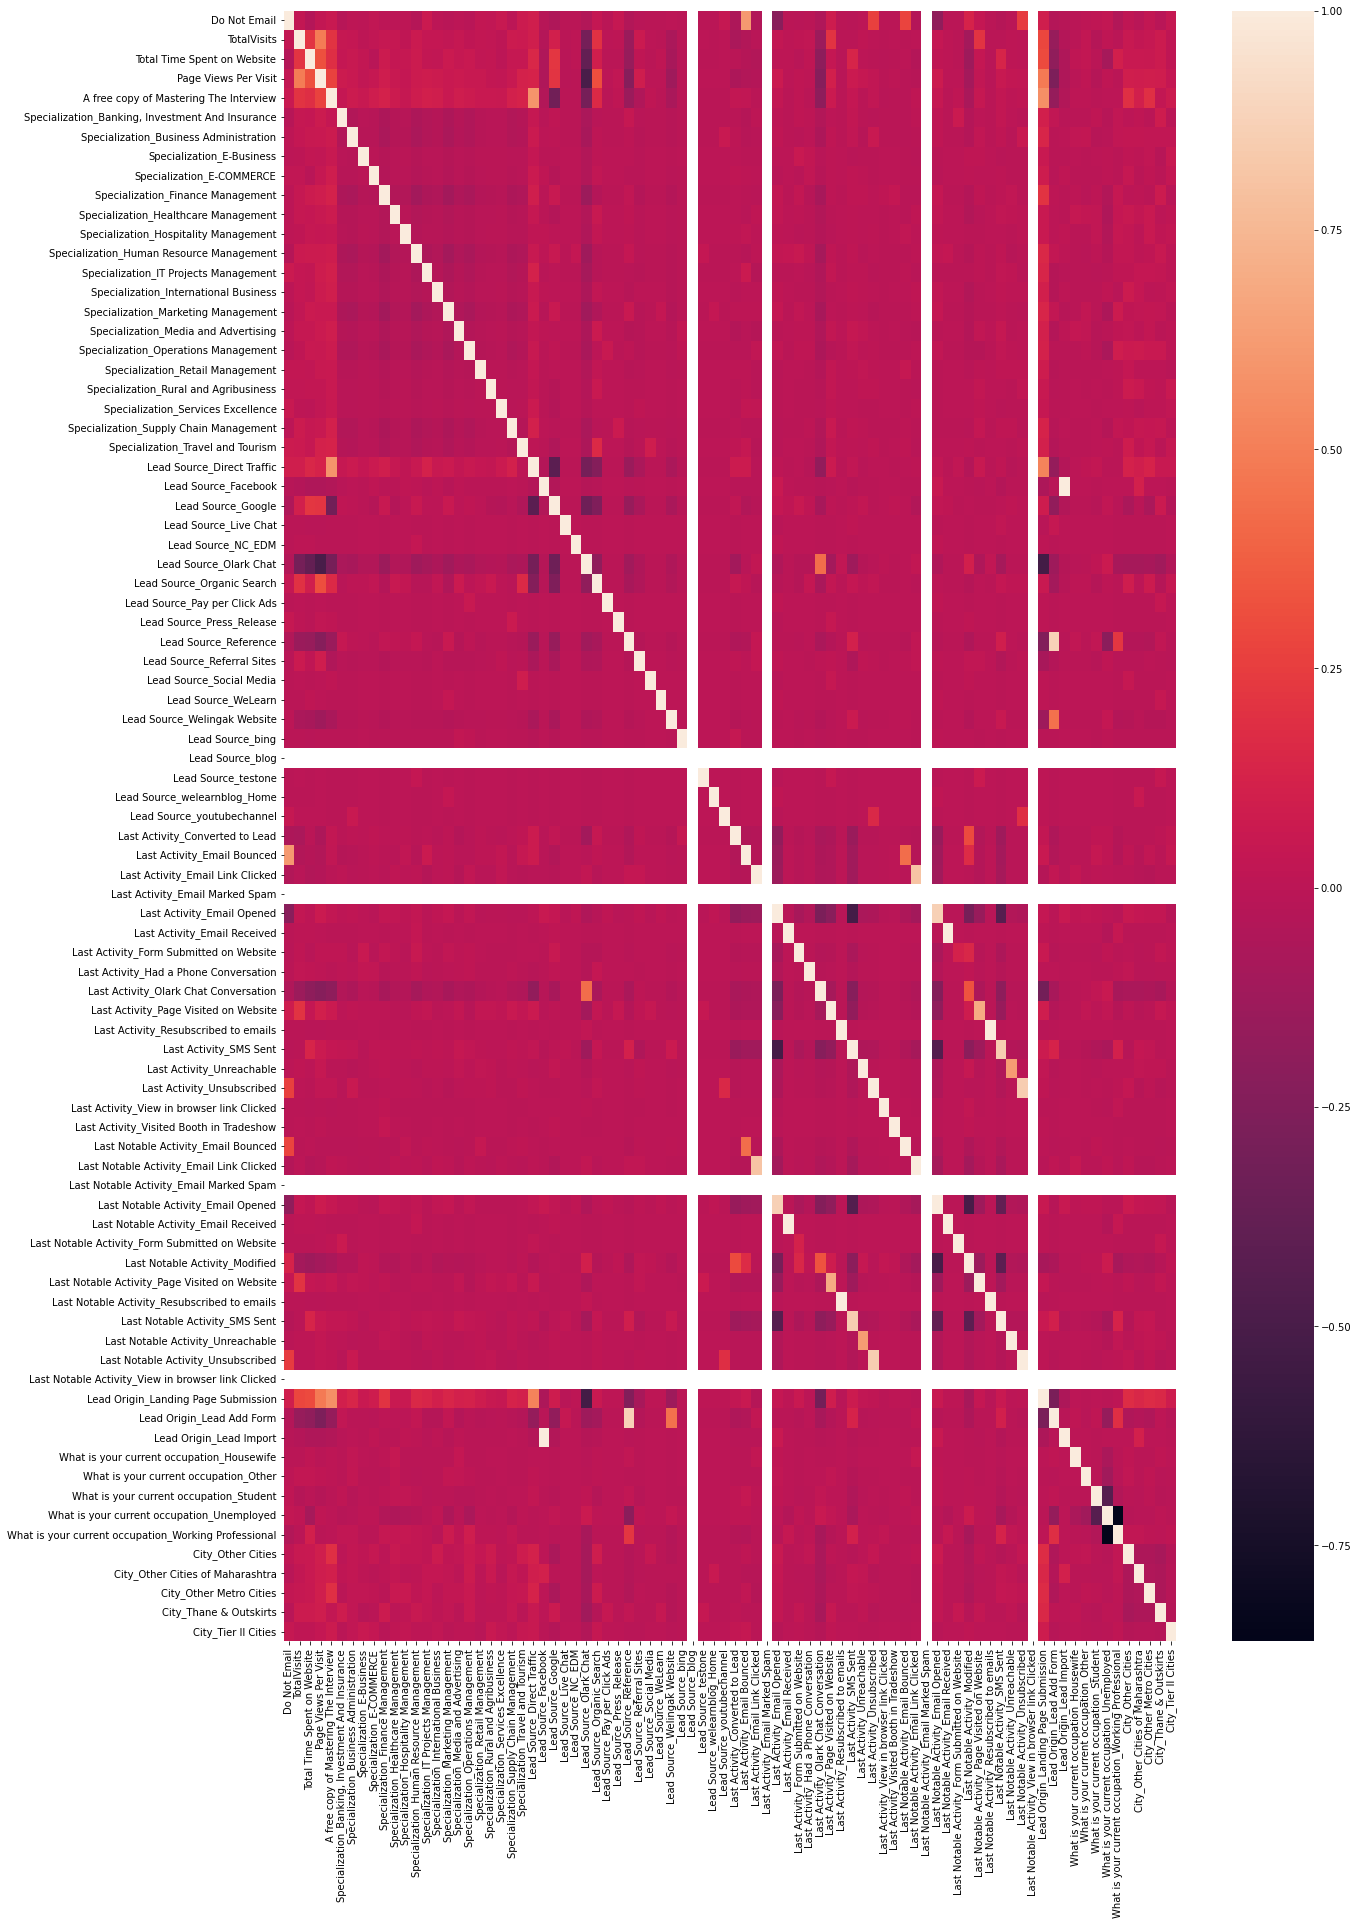

In [105]:
# To check the correlation among varibles
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()

Since there are a lot of variables it is difficult to drop variable. We'll do it after RFE

In [106]:
lead_st = (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100
lead_st

37.85541106458012

Right now we have almost 37.8% conversion rate.

# Model Building and RFE
    solver = liblinear solves the error - str has no attribute decode
    https://stackoverflow.com/questions/65682019/attributeerror-str-object-has-no-attribute-decode-in-fitting-logistic-regre

In [107]:
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')

In [108]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [109]:
rfe.support_

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False,  True, False, False, False,  True, False, False,
        True, False, False, False, False, False,  True,  True, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
        True, False,  True, False, False, False,  True, False, False,
       False, False, False])

In [110]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 37),
 ('TotalVisits', False, 53),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 51),
 ('A free copy of Mastering The Interview', False, 61),
 ('Specialization_Banking, Investment And Insurance', False, 7),
 ('Specialization_Business Administration', False, 18),
 ('Specialization_E-Business', False, 21),
 ('Specialization_E-COMMERCE', False, 17),
 ('Specialization_Finance Management', False, 11),
 ('Specialization_Healthcare Management', False, 16),
 ('Specialization_Hospitality Management', False, 48),
 ('Specialization_Human Resource Management', False, 15),
 ('Specialization_IT Projects Management', False, 14),
 ('Specialization_International Business', False, 19),
 ('Specialization_Marketing Management', False, 9),
 ('Specialization_Media and Advertising', False, 22),
 ('Specialization_Operations Management', False, 10),
 ('Specialization_Retail Management', False, 64),
 ('Specialization_Rural and Agribusiness', False, 8),
 ('Sp

In [111]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Lead Origin_Lead Add Form',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [112]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism', 'Lead Source_Facebook',
       'Lead Source_Live Chat', 'Lead Source

### Assessing the model with StatsModels

In [113]:
#model building through GLM of statsmodel

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2714.6
Date:                Thu, 04 Aug 2022   Deviance:                       5429.2
Time:                        18:17:20   Pearson chi2:                 6.56e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1439      0.086     -1.671      0.095      -0.313       0.025
Total Time Spent on Website                              1.0854      0.039     27.523      0.000       1.008       1.163
Lead Source_Direct Traffic                              -1.5414      0.113    -13.632      0.000      -1.763      -1.320
Lead Source_Google                                      -1.1665      0.108    -10.794      0.000      -1.378      -0.955
Lead Source_Organic Search                              -1.1925      0.129     -9.230      0.000      -1.446      -0.939
Lead Source_Referral Sites                              -1.5111      0.327     -4.623      0.000      -2.152      -0.870
Lead Source_Welingak Website                             2.5010      1.036      2.414      0.016       0.470       4.532
Last Activity_Converted to Lead                         -0.9930      0.201     -4.928      0.000      -1.388      -0.598
Last Activity_Email Bounced                             -1.8482      0.327     -5.648      0.000      -2.490      -1.207
Last Activity_Had a Phone Conversation                   2.2559      0.631      3.574      0.000       1.019       3.493
Last Activity_Olark Chat Conversation                   -1.4997      0.158     -9.475      0.000      -1.810      -1.189
Last Notable Activity_SMS Sent                           1.4520      0.078     18.509      0.000       1.298       1.606
Last Notable Activity_Unreachable                        1.6301      0.544      2.996      0.003       0.564       2.697
Lead Origin_Lead Add Form                                2.7121      0.230     11.794      0.000       2.261       3.163
What is your current occupation_Housewife               21.7135   1.35e+04      0.002      0.999   -2.64e+04    2.65e+04
What is your current occupation_Working Professional     2.7012      0.176     15.368      0.000       2.357       3.046
========================================================================================================================
"""

There are quite a few variable which have a p-value greater than 0.05. We will need to take care of them. But first, let's also look at the VIFs.

In [114]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [115]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Lead Origin_Lead Add Form,1.47
10,Last Notable Activity_SMS Sent,1.37
5,Lead Source_Welingak Website,1.29
2,Lead Source_Google,1.24
1,Lead Source_Direct Traffic,1.23
0,Total Time Spent on Website,1.18
14,What is your current occupation_Working Profes...,1.16
3,Lead Source_Organic Search,1.12
6,Last Activity_Converted to Lead,1.10
9,Last Activity_Olark Chat Conversation,1.08


In [116]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2714.6
Date:                Thu, 04 Aug 2022   Deviance:                       5429.2
Time:                        18:17:21   Pearson chi2:                 6.56e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1439      0.086     -1.671      0.095      -0.313       0.025
Total Time Spent on Website                              1.0854      0.039     27.523      0.000       1.008       1.163
Lead Source_Direct Traffic                              -1.5414      0.113    -13.632      0.000      -1.763      -1.320
Lead Source_Google                                      -1.1665      0.108    -10.794      0.000      -1.378      -0.955
Lead Source_Organic Search                              -1.1925      0.129     -9.230      0.000      -1.446      -0.939
Lead Source_Referral Sites                              -1.5111      0.327     -4.623      0.000      -2.152      -0.870
Lead Source_Welingak Website                             2.5010      1.036      2.414      0.016       0.470       4.532
Last Activity_Converted to Lead                         -0.9930      0.201     -4.928      0.000      -1.388      -0.598
Last Activity_Email Bounced                             -1.8482      0.327     -5.648      0.000      -2.490      -1.207
Last Activity_Had a Phone Conversation                   2.2559      0.631      3.574      0.000       1.019       3.493
Last Activity_Olark Chat Conversation                   -1.4997      0.158     -9.475      0.000      -1.810      -1.189
Last Notable Activity_SMS Sent                           1.4520      0.078     18.509      0.000       1.298       1.606
Last Notable Activity_Unreachable                        1.6301      0.544      2.996      0.003       0.564       2.697
Lead Origin_Lead Add Form                                2.7121      0.230     11.794      0.000       2.261       3.163
What is your current occupation_Housewife               21.7135   1.35e+04      0.002      0.999   -2.64e+04    2.65e+04
What is your current occupation_Working Professional     2.7012      0.176     15.368      0.000       2.357       3.046
========================================================================================================================
"""

In [117]:
#Creating Prediction
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3563    0.556676
273     0.157981
1903    0.111333
4982    0.788400
3213    0.156141
7029    0.069560
6579    0.745417
1384    0.155844
6440    0.510273
2369    0.069125
dtype: float64

In [118]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.55667564, 0.15798063, 0.11133266, 0.78839959, 0.15614064,
       0.06955979, 0.74541652, 0.15584353, 0.51027266, 0.06912507])

In [119]:
#Creating a dataframe with actual converted flag and the predicted probability
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,1,0.556676,3563
1,0,0.157981,273
2,0,0.111333,1903
3,1,0.788400,4982
4,0,0.156141,3213


In [120]:
#Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [121]:
# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,1,0.556676,3563,1
1,0,0.157981,273,0
2,0,0.111333,1903,0
3,1,0.788400,4982,1
4,0,0.156141,3213,0


Model Evaluation
    Importing metrics from sklearn for evaluation

In [122]:
from sklearn import metrics

In [123]:
#Creating confusion matrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3489  463]
 [ 766 1633]]


In [124]:
# Predicted     not_churn    churn
# Actual
# not_churn        3489       462
# churn             766      1633

In [125]:
# Check the overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8064871673752165


That's around 81% accuracy with is a very good value

In [126]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Lead Origin_Lead Add Form,1.47
10,Last Notable Activity_SMS Sent,1.37
5,Lead Source_Welingak Website,1.29
2,Lead Source_Google,1.24
1,Lead Source_Direct Traffic,1.23
0,Total Time Spent on Website,1.18
14,What is your current occupation_Working Profes...,1.16
3,Lead Source_Organic Search,1.12
6,Last Activity_Converted to Lead,1.10
9,Last Activity_Olark Chat Conversation,1.08


In [127]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [128]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6807002917882451

In [129]:
# Let us calculate specificity
TN / float(TN+FP)

0.8828441295546559

With the current cut off as 0.5 we have around 81% accuracy, sensitivity of around 68% and specificity of around 88%

In [130]:
# Calculating the false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.11715587044534413


In [131]:
# positive predictive value 
print (TP / float(TP+FP))

0.7791030534351145


In [132]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8199764982373678


# Plotting ROC Curve
    It shows the tradeoff between sensitivity and specificity 
    The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
    The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [133]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [134]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

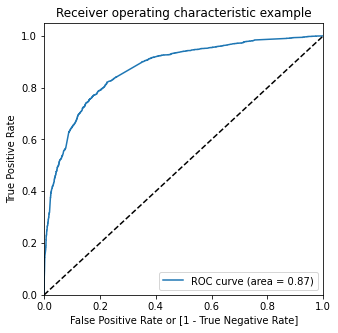

In [135]:
# Calling the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

The area under ROC curve is 0.87 which is a very good value.

In [136]:
# Let's find the optimal cutoff. 
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.556676,3563,1,1,1,1,1,1,1,0,0,0,0
1,0,0.157981,273,0,1,1,0,0,0,0,0,0,0,0
2,0,0.111333,1903,0,1,1,0,0,0,0,0,0,0,0
3,1,0.788400,4982,1,1,1,1,1,1,1,1,1,0,0
4,0,0.156141,3213,0,1,1,0,0,0,0,0,0,0,0


In [137]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

In [138]:
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.377736  1.000000  0.000000
0.1   0.1  0.582271  0.964152  0.350455
0.2   0.2  0.731853  0.912880  0.621964
0.3   0.3  0.792001  0.822009  0.773785
0.4   0.4  0.806015  0.749479  0.840334
0.5   0.5  0.806487  0.680700  0.882844
0.6   0.6  0.788537  0.558149  0.928391
0.7   0.7  0.778460  0.491455  0.952682
0.8   0.8  0.758778  0.404752  0.973684
0.9   0.9  0.710597  0.249271  0.990638


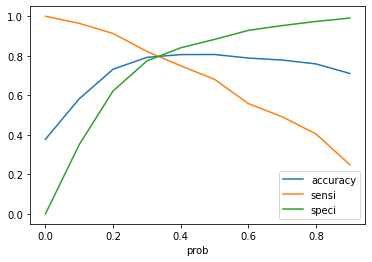

In [139]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the graph it is visible that the optimal cut off is at 0.35

In [140]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.34 else 0)

In [141]:
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.556676,3563,1,1,1,1,1,1,1,0,0,0,0,1
1,0,0.157981,273,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.111333,1903,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.788400,4982,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.156141,3213,0,1,1,0,0,0,0,0,0,0,0,0


In [142]:
# Checking the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7954652810581011

In [143]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3153,  799],
       [ 500, 1899]], dtype=int64)

In [144]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [145]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7915798249270529

In [146]:
# Let's us calculate specificity
TN / float(TN+FP)

0.7978238866396761

With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80%

In [147]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.2021761133603239


In [148]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7038547071905115


In [149]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8631261976457706


### Prediction and recall on Test set

In [150]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3489,  463],
       [ 766, 1633]], dtype=int64)

In [151]:
## Prediction
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7791030534351145

In [152]:
# Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6807002917882451

With the current cut off as 0.35 we have Precision around 78% and Recall around 68%

In [153]:
from sklearn.metrics import precision_score, recall_score

In [154]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7791030534351145

In [155]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6807002917882451

In [156]:
# Precision And Recall Tradeoff
from sklearn.metrics import precision_recall_curve

In [157]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       0
 2       0
 3       1
 4       0
        ..
 6346    1
 6347    0
 6348    0
 6349    1
 6350    1
 Name: Converted, Length: 6351, dtype: int64,
 0       1
 1       0
 2       0
 3       1
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    1
 Name: predicted, Length: 6351, dtype: int64)

In [158]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

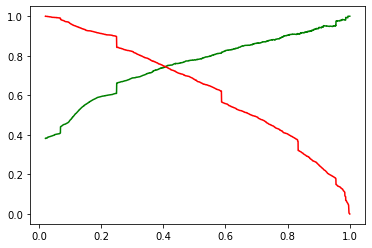

In [159]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [160]:
num_cols1=X_test.select_dtypes(include=['float64', 'int64']).columns
X_test[num_cols1] = scaler.transform(X_test[num_cols1])

In [161]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Lead Origin_Lead Add Form,What is your current occupation_Housewife,What is your current occupation_Working Professional
4870,-0.881378,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3315,1.909330,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5166,-0.881378,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5210,1.656306,1,0,0,0,0,0,0,0,0,1,0,0,0,0
8447,-0.645098,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [162]:
X_test_sm = sm.add_constant(X_test)

In [163]:
y_test_pred = res.predict(X_test_sm)

In [164]:
y_test_pred[:10]

4870    0.249647
3315    0.595581
5166    0.069125
5210    0.826997
8447    0.084287
4976    0.336477
6486    0.874756
8102    0.249647
4394    0.173033
659     0.249647
dtype: float64

In [165]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [166]:
# Let's see the head
y_pred_1.head()

,0
4870,0.249647
3315,0.595581
5166,0.069125
5210,0.826997
8447,0.084287


In [167]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [168]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [169]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [170]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [171]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,4870,0.249647
1,1,3315,0.595581
2,0,5166,0.069125
3,1,5210,0.826997
4,0,8447,0.084287


In [172]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [173]:
# Rearranging the columns
#y_pred_final = y_pred_final.reindex_axis(['Prospect ID','Converted','Converted_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Prospect ID,Converted_Prob
0,0,4870,0.249647
1,1,3315,0.595581
2,0,5166,0.069125
3,1,5210,0.826997
4,0,8447,0.084287


In [174]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.40 else 0)

In [175]:
y_pred_final.head()

,Converted,Prospect ID,Converted_Prob,final_predicted
0,0,4870,0.249647,0
1,1,3315,0.595581,1
2,0,5166,0.069125,0
3,1,5210,0.826997,1
4,0,8447,0.084287,0


In [176]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8178479618068307

In [177]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1428,  259],
       [ 237,  799]], dtype=int64)

In [178]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [179]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7712355212355212

In [180]:
# Let us calculate specificity
TN / float(TN+FP)

0.8464730290456431

In [181]:
Converted = (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100
Converted

37.85541106458012

In [182]:
Converted_pred = (sum(y_pred_final['final_predicted'])/len(y_pred_final['final_predicted'].index))*100
Converted_pred

38.854204921042964

In [183]:
y_pred_final.drop('Converted',1 , inplace = True)
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100, 2))
y_pred_final.set_index('Prospect ID')

,Converted_Prob,final_predicted,Lead_Score
Prospect ID,,,
4870,0.249647,0,24.96
3315,0.595581,1,59.56
5166,0.069125,0,6.91
5210,0.826997,1,82.70
8447,0.084287,0,8.43
...,...,...,...
8200,0.355179,0,35.52
6943,0.638959,1,63.90
5841,0.069125,0,6.91


# Conclusion
    Variables that mattered the most in the potential buyers are
       1. The total time spend on the Website.
       2. Total number of visits.
       3. When their current occupation is as a working professional.
       4. Page Views Per Visit
       5. When the lead source was:
            a. Google
            b. Direct traffic
            c. Organic search
            d. Welingak website
       6. When the last activity was:
            a. SMS
            b. Olark chat conversation